In [1]:
import os
if os.getcwd().endswith("experiments"):
    os.chdir("..")

os.getcwd()

'/home/lars/code/python/context-aware-flow-matching'

In [2]:
import torch
from torch.utils.data import random_split

import matplotlib.pyplot as plt

from pathlib import Path

from lightning import seed_everything

from lightning_trainable.utils import find_checkpoint

from src.datasets import ContextAwareFlowMatchingDataset as CAFMDataset, ModelNet10Dataset
from src.models import Model
import src.visualization as viz
import src.utils as U

In [3]:
torch.autograd.set_grad_enabled(False)

In [4]:
seed_everything(42)

Seed set to 42


42

In [5]:
cp = find_checkpoint(version=10)
cp = Path(cp)
cp

PosixPath('lightning_logs/version_10/checkpoints/last.ckpt')

In [6]:
hparams = Model.hparams_type.from_yaml(cp.parent.parent / "hparams.yaml")
model = Model.load_from_checkpoint(cp, hparams=hparams)
model = model.eval()

In [7]:
shapes = 32
layout = (4, 8)
points = 2048

use_blender = True

In [8]:
with U.temporary_seed(42):
    samples = model.sample((shapes, points), integrator="euler", steps=250, progress=True)
torch.save(samples, "samples/model_samples.pt")

Solving ODE: 100%|██████████████████████████████████████████████████████████████████████████████████████▋| 0.996/1 [01:35<00:00]/home/lars/.local/lib/python3.10/site-packages/tqdm/std.py:533: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
Solving ODE: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:35<00:00]


In [9]:
samples = torch.load("samples/model_samples.pt", map_location="cpu").numpy()
samples.shape

(32, 2048, 3)

Rendering: 100%|████████████████████████████████████████████████████████████████████████████████| 32/32 [01:29<00:00,  2.79s/it]


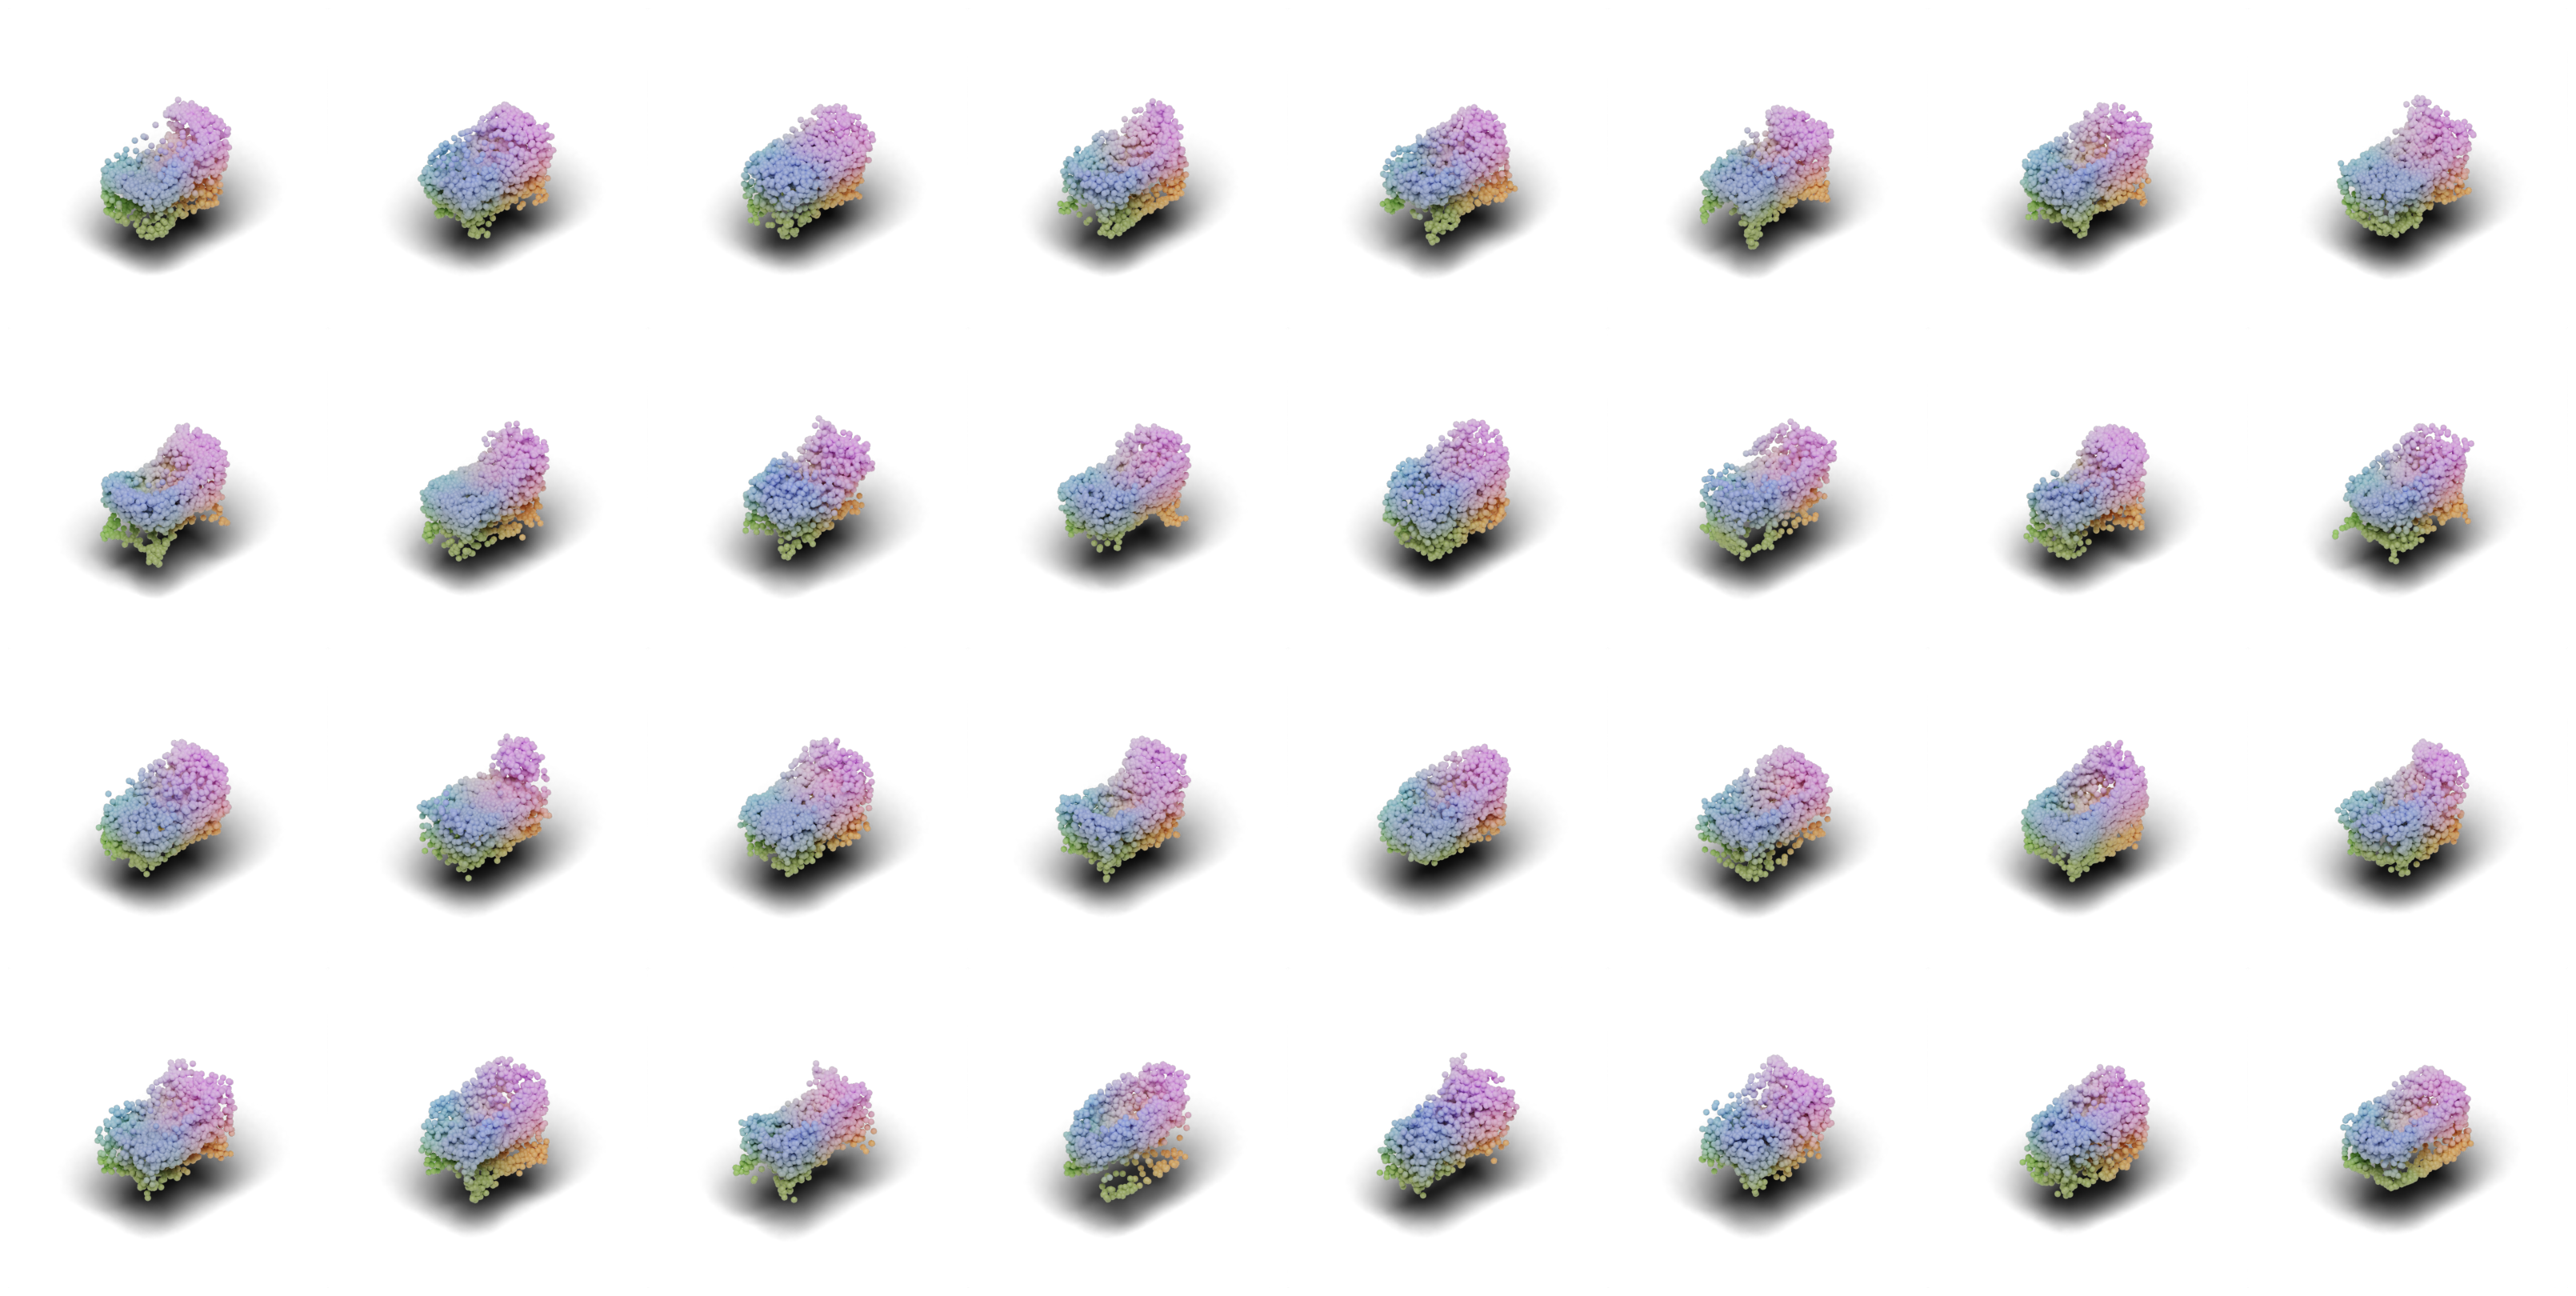

In [10]:
if use_blender:
    viz.multiscatter_bp(samples, layout=layout)
else:
    viz.multiscatter(samples, layout=layout)

plt.savefig("figures/model_samples.png", dpi=100, bbox_inches="tight")